<a href="https://colab.research.google.com/github/Gationhe/Python/blob/main/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
import numpy as np

In [2]:
print(scipy.__version__)

1.15.3


# Constants

Related to SI unit.

In [22]:
from scipy import constants

print(constants.liter)
print(constants.pi)

# a list of all units under the constants module can be seen using dir()
print(dir(constants))

0.001
3.141592653589793
['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_codata', '_constants', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'g

# Optimizers

In [33]:
from scipy.optimize import root

def f(x):
  return x + np.cos(x)

myroot = root(f, 0) # root(function, intial_guess)
print(myroot.x)
print(myroot) # More info. about root

[-0.73908513]
 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
  method: hybr
    nfev: 11
    fjac: [[-1.000e+00]]
       r: [-1.674e+00]
     qtf: [-2.668e-13]


In [36]:
from scipy.optimize import minimize

def f(x):
  return x**2 + x + 2

mymin = minimize(f, 0) # minimize(function, intial_guess, method)

print(mymin)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.75
        x: [-5.000e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4


Note: If not given method, chosen to be one of BFGS, L-BFGS-B, SLSQP, depending on whether or not the problem has constraints or bounds.

# Sparse Data

SciPy has a module, *scipy.sparse* that provides functions to deal with sparse data.  
There are primarily two types of sparse matrices that we use:  
*   CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.
*   CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

In [11]:
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr)) # create CSR matrix from array

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 9)>
  Coords	Values
  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


In [17]:
arr = np.resize(arr, (3, 3)) # 1x9 to 3x3

print(csr_matrix(arr).data) # view stored data (nonzero items)
print(csr_matrix(arr).count_nonzero()) # count num. of nonzero items

[1 1 2]
3


In [21]:
M = csr_matrix(arr)

# remove zero entries from matrix
M.eliminate_zeros()
print(M)

# eliminate duplicates
M.sum_duplicates()
print(M)

# convert from CSR to CSC
print(csr_matrix(arr).tocsc())

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (1, 2)	1
  (2, 0)	1
  (2, 2)	2
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (1, 2)	1
  (2, 0)	1
  (2, 2)	2
<Compressed Sparse Column sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


Note: Apart from the mentioned sparse specific operations, sparse matrices support all of the operations that normal matrices support e.g. reshaping, summing, arithemetic, broadcasting etc.

# Graphs

SciPy provides us with the module *scipy.sparse.csgraph* for working with graphs.

Definition (Adjacency Matrix):  
Adjacency matrix is a nxn matrix where n is the number of elements in a graph. Moreover, the values represents the connection between the elements.

In [23]:
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

M = csr_matrix(arr)

print(connected_components(M))

(1, array([0, 0, 0], dtype=int32))


Returns (of connected_components()):  
*   n_components: the number of connected components.
*   labels: the length-N array of labels of the connected components.

More information about graphs, please refer to https://www.w3schools.com/python/scipy/scipy_graphs.php.

# Spatial Data

Spatial data refers to data that is represented in a geometric space.

SciPy provides us with the module *scipy.spatial*, which has functions for working with spatial data.

*   A Triangulation of a polygon is to divide the polygon into multiple triangles with which we can compute an area of the polygon.
*   A Triangulation with points means creating surface composed triangles in which all of the given points are on at least one vertex of any triangle in the surface.

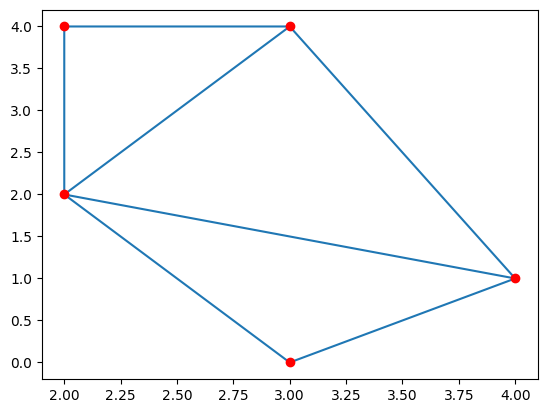

In [24]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices # generate these triangulations through points

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

Note: The simplices property creates a generalization of the triangle notation.

Convex Hull: the smallest polygon that covers all of the given points.

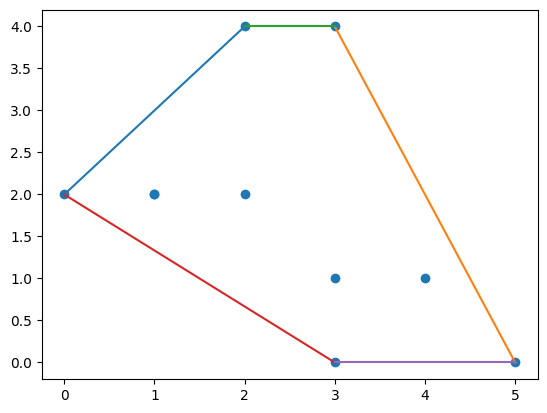

In [27]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)

plt.scatter(points[:,0], points[:,1])
for simplex in hull.simplices:
  plt.plot(points[simplex, 0], points[simplex, 1])
plt.show()

KDTrees: datastructure optimized for nearest neighbor queries.
*   KDTree(): return a KDTree object.
*   query(): return the distance to the nearest neighbor and the location of the neighbors.



In [29]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

print(KDTree(points).query((1, 1))) # find the nearest neighbor to point (1,1)

(2.0, np.int64(0))


See the distance:

In [32]:
from scipy.spatial.distance import euclidean, cosine, hamming

p1 = (1, 0)
p2 = (10, 2)

a = (True, False, True)
b = (False, True, True)

print(f"The Euclidean distance between p1 and p2 is {euclidean(p1, p2)}.")
print(f"The cosine distance between p1 and p2 is {cosine(p1, p2)}.")
print(f"The Hamming distance between a and b is {hamming(a, b)}.")

The Euclidean distance between p1 and p2 is 9.219544457292887.
The cosine distance between p1 and p2 is 0.019419324309079777.
The Hamming distance between a and b is 0.6666666666666666.


Remark:  
Cosine Distance: the value of cosine angle between two points.  
Hamming Distance: the proportion of bits where two bits are different.

# Matlab Arrays

SciPy provides us with the module *scipy.io*, which has functions for working with Matlab arrays.

In [6]:
from scipy import io

arr = np.arange(10) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

io.savemat("array.mat", {"vec": arr}) # savemat(filename, mdict, do_compression = False)

mydata = io.loadmat("array.mat") # loadmat(filename)

print(mydata)
print(mydata['vec']) # note: the dimension is increased by 1, solution: loadmat(filename, squeeze_me = True)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jun 13 03:25:49 2025', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}
[[0 1 2 3 4 5 6 7 8 9]]


# Interpolation

*   Interpolation: the method for generating points between given points.
*   Imputation: the method of filling values.

SciPy provides us with a module called *scipy.interpolate* which has many functions to deal with interpolation.

In [7]:
from scipy.interpolate import interp1d # 1D Interpolation
from scipy.interpolate import UnivariateSpline # Spline Interpolation
from scipy.interpolate import Rbf # Radial Basis Interpolation

x = np.arange(10)
y = 2 * x + 1
z = x**2 + np.sin(x) + 1

p1 = interp1d(x, y)
p2 = UnivariateSpline(x, z)
p3 = Rbf(x, z)

a1 = p1(np.arange(2, 3, 0.1))
a2 = p2(np.arange(2, 3, 0.1))
a3 = p3(np.arange(2, 3, 0.1))

print(f"{a1}\n")
print(f"{a2}\n")
print(f"{a3}\n")

[5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]

[5.23644763 5.62826474 6.03987348 6.47131994 6.92265019 7.3939103
 7.88514634 8.39640439 8.92773053 9.47917082]

[5.90929743 6.25748981 6.62190817 7.00310702 7.40121814 7.8161443
 8.24773402 8.69590519 9.16070828 9.64233874]



Radial basis function: a function that is defined corresponding to a fixed reference point.

# Significance Test

SciPy provides us with a module called *scipy.stats*, which has functions for performing statistical significance tests.  
*   Null Hypothesis: the observation is not statistically significant.
*   Alternate Hypothesis: the observations are due to some reason and alternate to Null Hypothesis.
*   One tailed test: our hypothesis is testing for one side of the value only.
*   Two tailed test: our hypothesis is testing for both side of the values.
*   Alpha value: the level of significance.
*   P value: how close to extreme the data actually is.
*   T-Test: to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution.
*   KS-Test: to check if given values follow a distribution.

In [8]:
from scipy.stats import ttest_ind # T-Test
from scipy.stats import kstest # KS-Test
from scipy.stats import describe
from scipy.stats import skew, kurtosis # 偏度、峰度
from scipy.stats import normaltest

v = np.random.normal(size = 100)
w = np.random.normal(size = 100)

print(ttest_ind(v, w).pvalue)
print(kstest(v, w).pvalue)
print(describe(v))
print(skew(v))
print(kurtosis(v))
print(normaltest(v))

0.10884145845202232
0.36818778606286096
DescribeResult(nobs=100, minmax=(np.float64(-2.2648777196807552), np.float64(2.8640877070748614)), mean=np.float64(0.03919389515982659), variance=np.float64(1.1156265797401173), skewness=np.float64(0.18771218231375755), kurtosis=np.float64(-0.2081313147932642))
0.18771218231375755
-0.2081313147932642
NormaltestResult(statistic=np.float64(0.6891594465773114), pvalue=np.float64(0.7085180645449967))


# Reference(s)

W3Schools: https://www.w3schools.com/python/scipy/index.php